# DECISION TREES


### IMPORTING LIBRARIES 

In [23]:
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

### LOADING THE DATA

In [24]:
df=pd.read_csv('docs_1\master.csv') 
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### CHECKING FOR MISSING VALUES

In [25]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### REMOVING THE HDI FOR YEAR COLUMN

In [26]:
df.fillna(0,axis=1) 
df.drop('generation',axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### CHANGING THE CATEGORICAL FEATURES

In [27]:
x=len(df.country.unique())
r=[i for i in range(1,x+1)]
k=df.country.unique() 
for i in range(x):
    df['country'].replace({k[i]:r[i]},inplace=True)
df['sex'].replace({'male':0,'female':1},inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,1,1987,0,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,1987,0,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,1,1987,1,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,1,1987,0,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,1,1987,0,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### RETRIVING THE IMPORTANT DATA FROM DF TO TRAIN MY MODEL 

In [28]:
col=['country','year','population','sex','suicides_no','suicides/100k pop','gdp_per_capita ($)']
x=df[col] 
y=df['suicides_no'] 
x.head()

,country,year,population,sex,suicides_no,suicides/100k pop,gdp_per_capita ($)
0,1,1987,312900,0,21,6.71,796
1,1,1987,308000,0,16,5.19,796
2,1,1987,289700,1,14,4.83,796
3,1,1987,21800,0,1,4.59,796
4,1,1987,274300,0,9,3.28,796


### SPLITING THE DATA 

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
print(x_train.shape,y_train.shape) 
print(x_test.shape,y_test.shape)

(22256, 7) (22256,)
(5564, 7) (5564,)


### APPLYING DECISION TREE MODEL 

In [30]:
model=DecisionTreeRegressor() 
model.fit(x_train,y_train) 
y_pred=model.predict(x_test) 

### CALCULATING THE ACCURACY 

In [31]:
print('THE ACCURACY IS -> {}'.format(metrics.accuracy_score(y_pred,y_test))) 

THE ACCURACY IS -> 0.9390726096333573


### visualizing

<Figure size 432x288 with 0 Axes>

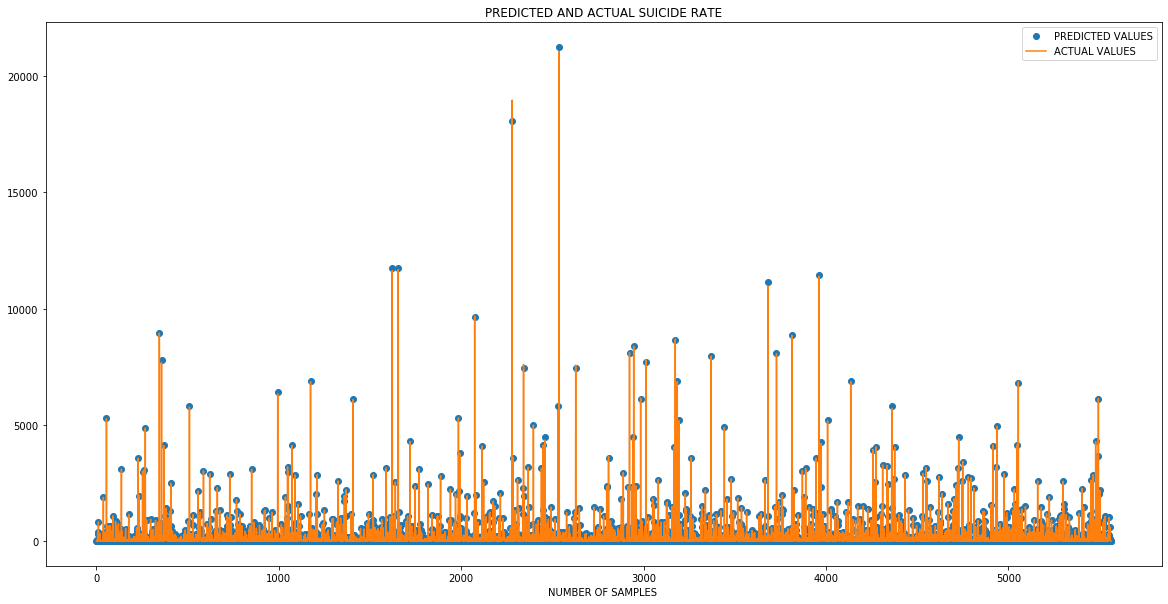

In [41]:
plt.figure(1)
plt.figure(figsize = (20,10))
plt.plot(np.arange(len(y_pred)),y_pred, 'o', label = "predicted values".upper())
plt.title('predicted and actual suicide rate'.upper())
plt.xlabel("number of samples ".upper())
#plt.figure(2)
plt.plot(np.arange(len(y_pred)),y_test.values,label = "actual values".upper())
plt.legend(loc = 'best')